In [1]:
#! /usr/bin/python3

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#  Reading in log file
df = pd.read_csv('Logs/Log00020.csv', delimiter=',') 

# Dropping exta info
df = df.iloc[: ,3:]
df = df.drop(columns=[" Bat [V]", " R_u [deg]", " P_u [deg]", " Temp RTC [C]"])
df = df.iloc[: ,:-2]

cols = [' UVA_u', ' UVB_u', ' White_u', ' Vis_u [lx]', ' IR_S_u',
       ' IR_M_u']
       
y = df[[' Pyro [uV]']]
X = df.drop(columns=[' Pyro [uV]', " TempOB [C]"])

C:\Users\Tyler\AppData\Local\Temp\ipykernel_8640\2549085438.py:14: DtypeWarning: Columns (3,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Logs/Log00020.csv', delimiter=',')


C:\Users\Tyler\AppData\Local\Temp\ipykernel_8640\1344836135.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

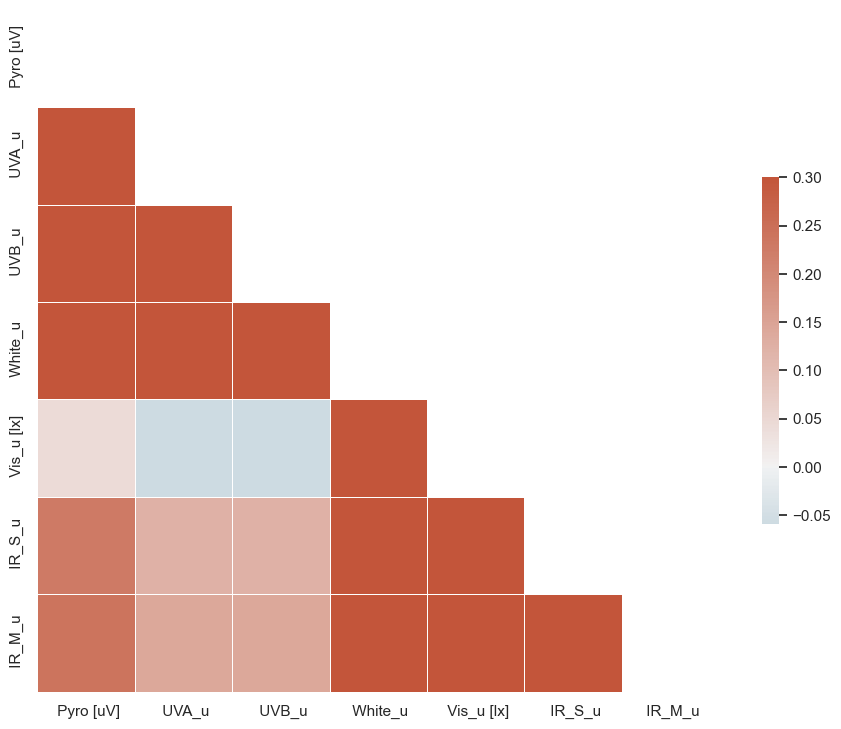

In [3]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})